# Chapter 5.
### Text classification. NLP (Natural Language Processing). Recurrent Neural Networks (RNN).

Looking back at the CNN-based architectures so far, we can see they have always working on one complete snapshot of time. But consider this two sentence fragments:

```The cat sat on the mat.```
```She got up and impatiently climbed on the chair, meowing for food.```

Say you were to feed those two senteces, one after the other, into a CNN and ask, ***where is the cat?***

You'd have a problem, because the network has not concept of memory. This is incredibly important when it comes to dealing with data that has a temporal domain(e.g, text, speech, video, and time=series data). *Recurrent neural networks (RNNs)* answer this problem by giving neural networks a memory via a *Hidden state.*

What does an RNN look like? It is basically an ANN crossed with a for loop.

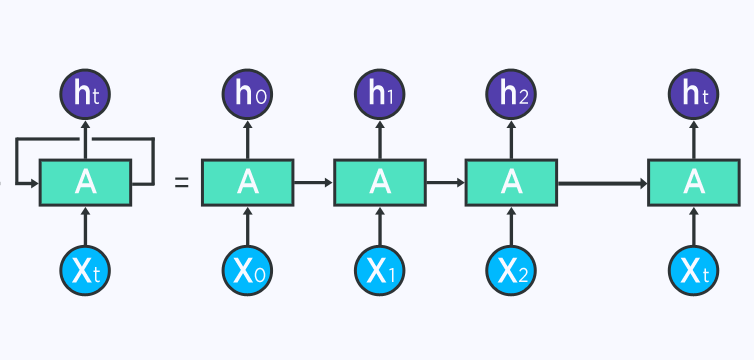


We add input at time step of *t*, and we get a *hidden* output state of *ht*, and the output also gets fed back into the RNN for the next time step. We can unroll this network as shown in the previous figure.

What we have is a group of fully connected layers (with shared parameters), a series of inputs, and our output. Input data is fed into the network, and the next item in the sequence is predicted as output. In the unrolled view, we can see that the RNN can be thought of as a pipeline of fully connected layers, with successive input being fed into the next layer in the sequence (with the usual nonlinearities such as ```ReLU``` being inserted between layers). When we have our completed predicted sequence, we then have to backpropagate the error back through the RNN.
Because this involves stepping back through the network's steps, this process is known as backpropagation through time. The error is calculated on the entire sequence, then the network is unfolded, as in the previous figure, and the gradients are calculated for each time step and combined to update the shared parameters of the network. You can imagine it as doing backprop on individual networks and summing all the gradients together.

That's the theory behind RNNs. But this simple structure leads to problems that has to be overcomed with newer architectures.

# Long Short-Term Memory Networks

In practice, RNNs were suceptible to *vanishing gradient* problem, or the potentionally worse scenario of *exploding gradient*, where your error tends off towards infinity. Neither is good, so RNNs couldn't be brought to bear on many of the problems they were considered suitable for. That changed with the LSTM variant of RNN.

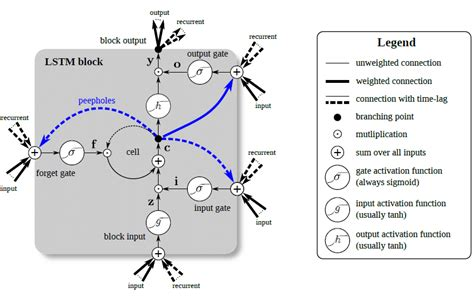

In the standard RNN, we "remember" everything forever. But that's not how our brains work, and the LSTM's forget game allows us to model the idea that as we continue in our input chain, the beginning of the chain becomes less important. And how much the LSTM forgets is something that is learned during training, so if it's in the network's best interes to be very forgetful, the forget parameters will do so.

The *cell* ends up being the "memory" of the network layer; and the input, output, and forget gates will determine how data flows through the layer. The data may simply pass through, it may "write" to the cell, and that data may (or may not) flow through to the next layer, modified by the output gate.

This assemblage of parts was enough to solve the vanishing gradient problem, and also has the virtue of being Turing-complete, so theoretically, you can do any calculation that you can do on a computer with one of these.


# Gated Recurrent Units

The main take away is that the GRU has merged the forget gate with the output gate. This means it has fewer parameters than an LSTM and so tends to be quicker to train and uses fewer resources at runtime. For these reasons, and also that they're essentially a drop-in replacement for LSTMs, they've become quite popular. However, strictly speaking, they are less powerful than LSTMs because of the merging of the forget and output gates.

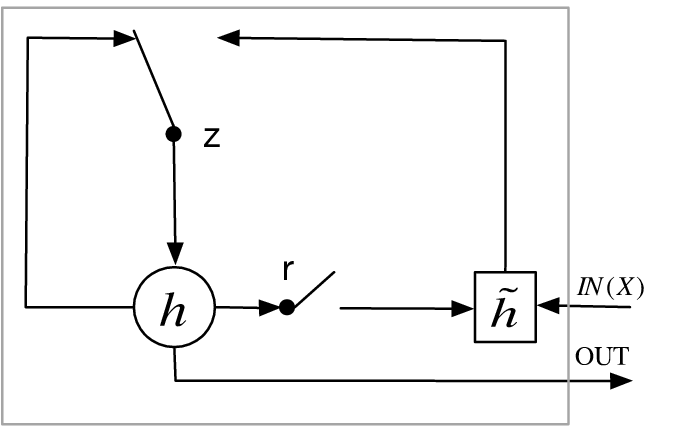

# biLSTM

Another common variant of the LSTM is the *bidirectional* LSTM or *biLSTM* for short. As you've seen so far, traditional LSTMs (and RNNs in general) can look to the past as they are trained and make decisions. Unfortunately, sometimes you need to see the future as well. This is particularly the case in applications like translation and hand-writing recognition, where what comes after the current state can be just as important as the rpevious state for determining output.

A biLSTM solves this problem in the simplest of the ways: it's essentially two stacked LSTM, with the input being sent in the forward direction in one LSTM and reversed in the second